<a href="https://colab.research.google.com/github/mcmejiag14/Deep-Learning/blob/main/CaseStudy1Camila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from collections import Counter

1.We will load our dataset

In [307]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [308]:
data = pd.read_csv('/content/drive/MyDrive/QualityOfLifeData.csv')

In [309]:
data

,ID,INTERVIEWDATE,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,...,MSA_Q_16,MSA_Q_17,PH2_Q_01,PH2_Q_02,TOS_Q_01,TOS_Q_02,TOS_Q_03,TOS_Q_04,CHARLSONSCORE,CHRONICDISEASESCORE
0,171,0,1,49,3,2,4,4,4,4,...,2,2,3,4,2,1,4,5,2,1.60
1,171,427,1,49,3,2,4,3,4,4,...,3,1,2,4,2,1,4,5,2,1.60
2,172,0,1,62,3,2,3,3,4,2,...,5,1,1,1,2,1,4,5,3,1.54
3,179,0,1,44,7,2,6,6,6,6,...,6,6,5,5,4,4,4,5,1,2.97
4,180,0,1,64,3,1,3,2,3,3,...,1,1,1,1,1,4,4,5,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2834,0,2,60,4,1,4,4,4,3,...,2,1,2,2,1,4,4,5,1,2.54
2352,2835,0,1,81,4,1,3,4,3,5,...,2,1,3,2,1,4,4,5,0,0.34
2353,2836,0,1,40,3,1,4,3,4,4,...,1,1,4,1,1,4,4,5,1,0.63
2354,2837,0,1,54,4,1,4,2,3,3,...,1,1,1,1,1,4,4,5,0,0.86


The dataset has some missing data (denoted by ”-9”). First we will
remove these missing information.

In [310]:
# Remove rows with missing values in the CHRONICDISEASESCORE variable
data = data[data['CHRONICDISEASESCORE'] != -9]  ## Here it means remove all the rows that have the value -9?

In [311]:
# To see all the unique values in 'Column1':
unique_values = data['CHRONICDISEASESCORE'].unique()
print(unique_values)

[1.6  1.54 2.97 1.28 1.31 1.67 2.21 2.51 2.44 0.48 1.06 1.25 2.04 2.08
 0.66 0.88 1.57 3.18 0.74 2.34 0.34 1.97 0.67 0.81 1.01 2.87 2.57 1.2
 1.27 0.95 0.52 1.42 1.02 2.33 3.14 1.73 4.76 2.58 2.46 1.12 1.48 0.77
 2.45 0.54 0.82 1.26 4.15 3.17 2.23 3.26 2.89 1.99 1.65 0.91 2.17 2.64
 0.72 2.94 1.74 1.83 1.33 2.07 2.11 1.63 1.87 1.13 2.05 2.54 0.94 1.89
 1.98 3.15 3.65 0.4  1.45 1.78 2.81 2.41 0.6  2.42 1.88 2.67 2.1  1.66
 1.79 1.71 1.84 1.15 1.3  2.79 1.14 0.84 3.07 1.23 2.24 1.22 2.72 2.3
 0.61 2.48 1.4  1.35 0.   2.69 1.36 2.13 2.15 2.93 3.29 1.46 2.09 1.68
 2.25 1.95 2.2  2.49 1.81 4.26 1.49 1.03 2.66 2.19 1.55 2.37 3.24 2.43
 1.9  2.5  1.96 1.61 1.75 3.08 0.97 2.36 1.76 1.32 2.99 3.   3.03 1.5
 2.4  0.68 1.52 1.85 0.29 0.23 2.56 2.88 2.65 3.11 3.41 2.29 1.34 0.92
 1.8  3.6  1.77 1.86 0.63 0.32 2.8  0.8  2.01 2.52 3.02 3.32 1.24 1.21
 1.11 0.79 2.92 2.28 3.1  1.93 2.55 3.25 3.51 2.78 1.94 2.26 1.07 1.38
 2.59 2.35 0.73 0.86 3.06 2.53 2.77 1.19 1.62 2.63 0.96 3.22 1.18 1.51
 2.76 3.1

3. Now, we create a new variable called ”CAT CHRONICDISEASESCORE” by dividing the it to two groups called ”minor disease”(denoted by 0) and ”severe disease (denoted by 1) based on the mean value. That is, if a certain patient CHRONICDISEASESCORE is less than its mean, then he has minor
disease. Then we calculate the mean and then create our new variable.

In [312]:
# Calculate the mean of the CHRONICDISEASESCORE column
mean_value = data['CHRONICDISEASESCORE'].mean()

In [313]:
mean_value

1.4974706413730805

In [314]:
# Create the new variable "CAT CHRONICDISEASESCORE" based on the mean value
data['CAT_CHRONICDISEASESCORE'] = data['CHRONICDISEASESCORE'].apply(lambda x: 1 if x >= mean_value else 0)

<ipython-input-314-5f6181923084>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CAT_CHRONICDISEASESCORE'] = data['CHRONICDISEASESCORE'].apply(lambda x: 1 if x >= mean_value else 0)


In [315]:
data.to_csv("ModifiedQualityOfLifeDataWithCategories.csv", index=False)

4. now, we check for any other missing data.

In [316]:
# Check for missing data in the entire dataset
missing_data = data.isna().sum()
print(missing_data) ## It seems that there is no any missing value, it means that I do not have to do anything else?

ID                         0
INTERVIEWDATE              0
LANGUAGE                   0
AGE                        0
RACE_ETHNICITY             0
SEX                        0
QOL_Q_01                   0
QOL_Q_02                   0
QOL_Q_03                   0
QOL_Q_04                   0
QOL_Q_05                   0
QOL_Q_06                   0
QOL_Q_07                   0
QOL_Q_08                   0
QOL_Q_09                   0
QOL_Q_10                   0
MSA_Q_01                   0
MSA_Q_02                   0
MSA_Q_03                   0
MSA_Q_04                   0
MSA_Q_05                   0
MSA_Q_06                   0
MSA_Q_07                   0
MSA_Q_08                   0
MSA_Q_09                   0
MSA_Q_10                   0
MSA_Q_11                   0
MSA_Q_12                   0
MSA_Q_13                   0
MSA_Q_14                   0
MSA_Q_15                   0
MSA_Q_16                   0
MSA_Q_17                   0
PH2_Q_01                   0
PH2_Q_02      

In [317]:
# Count the NaN values in single column
nan_count = data['CHRONICDISEASESCORE'].isna().sum()
print(nan_count)

0


# **DESCRIPTIVE ANALYSIS**

In [318]:
data

,ID,INTERVIEWDATE,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,...,MSA_Q_17,PH2_Q_01,PH2_Q_02,TOS_Q_01,TOS_Q_02,TOS_Q_03,TOS_Q_04,CHARLSONSCORE,CHRONICDISEASESCORE,CAT_CHRONICDISEASESCORE
0,171,0,1,49,3,2,4,4,4,4,...,2,3,4,2,1,4,5,2,1.60,1
1,171,427,1,49,3,2,4,3,4,4,...,1,2,4,2,1,4,5,2,1.60,1
2,172,0,1,62,3,2,3,3,4,2,...,1,1,1,2,1,4,5,3,1.54,1
3,179,0,1,44,7,2,6,6,6,6,...,6,5,5,4,4,4,5,1,2.97,1
4,180,0,1,64,3,1,3,2,3,3,...,1,1,1,1,4,4,5,0,1.28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2834,0,2,60,4,1,4,4,4,3,...,1,2,2,1,4,4,5,1,2.54,1
2352,2835,0,1,81,4,1,3,4,3,5,...,1,3,2,1,4,4,5,0,0.34,0
2353,2836,0,1,40,3,1,4,3,4,4,...,1,4,1,1,4,4,5,1,0.63,0
2354,2837,0,1,54,4,1,4,2,3,3,...,1,1,1,1,4,4,5,0,0.86,0


In [319]:
data.describe()

,ID,INTERVIEWDATE,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,...,MSA_Q_17,PH2_Q_01,PH2_Q_02,TOS_Q_01,TOS_Q_02,TOS_Q_03,TOS_Q_04,CHARLSONSCORE,CHRONICDISEASESCORE,CAT_CHRONICDISEASESCORE
count,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,...,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000
mean,1465.406504,20.515808,1.208220,58.635050,3.619241,1.421861,3.665763,3.415086,3.710479,3.020325,...,2.065492,2.473803,2.361337,2.226287,3.288166,3.776423,4.670732,0.906956,1.497471,0.476965
std,759.615161,66.562396,0.406127,12.327566,1.247505,0.493968,1.035010,1.136332,1.024203,1.304184,...,1.531047,1.759871,1.733346,1.310328,1.364476,0.993956,1.272065,1.628490,0.789355,0.499582
min,171.000000,0.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,822.250000,0.000000,1.000000,52.000000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,0.000000,0.880000,0.000000
50%,1416.000000,0.000000,1.000000,59.000000,3.000000,1.000000,4.000000,3.000000,4.000000,3.000000,...,1.000000,2.000000,2.000000,2.000000,4.000000,4.000000,5.000000,1.000000,1.395000,0.000000
75%,2125.750000,0.000000,1.000000,66.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,1.000000,1.970000,1.000000
max,2838.000000,440.000000,2.000000,90.000000,7.000000,2.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,6.000000,10.000000,4.760000,1.000000


In [320]:
# Check data types
data_types = data.dtypes
print(data_types)

ID                           int64
INTERVIEWDATE                int64
LANGUAGE                     int64
AGE                          int64
RACE_ETHNICITY               int64
SEX                          int64
QOL_Q_01                     int64
QOL_Q_02                     int64
QOL_Q_03                     int64
QOL_Q_04                     int64
QOL_Q_05                     int64
QOL_Q_06                     int64
QOL_Q_07                     int64
QOL_Q_08                     int64
QOL_Q_09                     int64
QOL_Q_10                     int64
MSA_Q_01                     int64
MSA_Q_02                     int64
MSA_Q_03                     int64
MSA_Q_04                     int64
MSA_Q_05                     int64
MSA_Q_06                     int64
MSA_Q_07                     int64
MSA_Q_08                     int64
MSA_Q_09                     int64
MSA_Q_10                     int64
MSA_Q_11                     int64
MSA_Q_12                     int64
MSA_Q_13            

In [321]:
# To see all the unique values in 'Column1':
unique_values = data['RACE_ETHNICITY'].unique()
print(unique_values)

[3 7 4 2 6 1 5]


Correlation Analysis

In [322]:
# We need to remove some categorical variables and variables that does not contirbute to our analysis
columns_to_remove = ['SEX', 'ID', 'LANGUAGE','CAT_CHRONICDISEASESCORE','INTERVIEWDATE']

# Drop the specified columns
data2 = data.drop(columns=columns_to_remove)


In [323]:
# Descriptive statistics
summary_stats = data.describe()
correlation_matrix = data2.corr()

In [324]:
summary_stats

,ID,INTERVIEWDATE,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,...,MSA_Q_17,PH2_Q_01,PH2_Q_02,TOS_Q_01,TOS_Q_02,TOS_Q_03,TOS_Q_04,CHARLSONSCORE,CHRONICDISEASESCORE,CAT_CHRONICDISEASESCORE
count,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,...,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000
mean,1465.406504,20.515808,1.208220,58.635050,3.619241,1.421861,3.665763,3.415086,3.710479,3.020325,...,2.065492,2.473803,2.361337,2.226287,3.288166,3.776423,4.670732,0.906956,1.497471,0.476965
std,759.615161,66.562396,0.406127,12.327566,1.247505,0.493968,1.035010,1.136332,1.024203,1.304184,...,1.531047,1.759871,1.733346,1.310328,1.364476,0.993956,1.272065,1.628490,0.789355,0.499582
min,171.000000,0.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,822.250000,0.000000,1.000000,52.000000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,0.000000,0.880000,0.000000
50%,1416.000000,0.000000,1.000000,59.000000,3.000000,1.000000,4.000000,3.000000,4.000000,3.000000,...,1.000000,2.000000,2.000000,2.000000,4.000000,4.000000,5.000000,1.000000,1.395000,0.000000
75%,2125.750000,0.000000,1.000000,66.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,1.000000,1.970000,1.000000
max,2838.000000,440.000000,2.000000,90.000000,7.000000,2.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,6.000000,10.000000,4.760000,1.000000


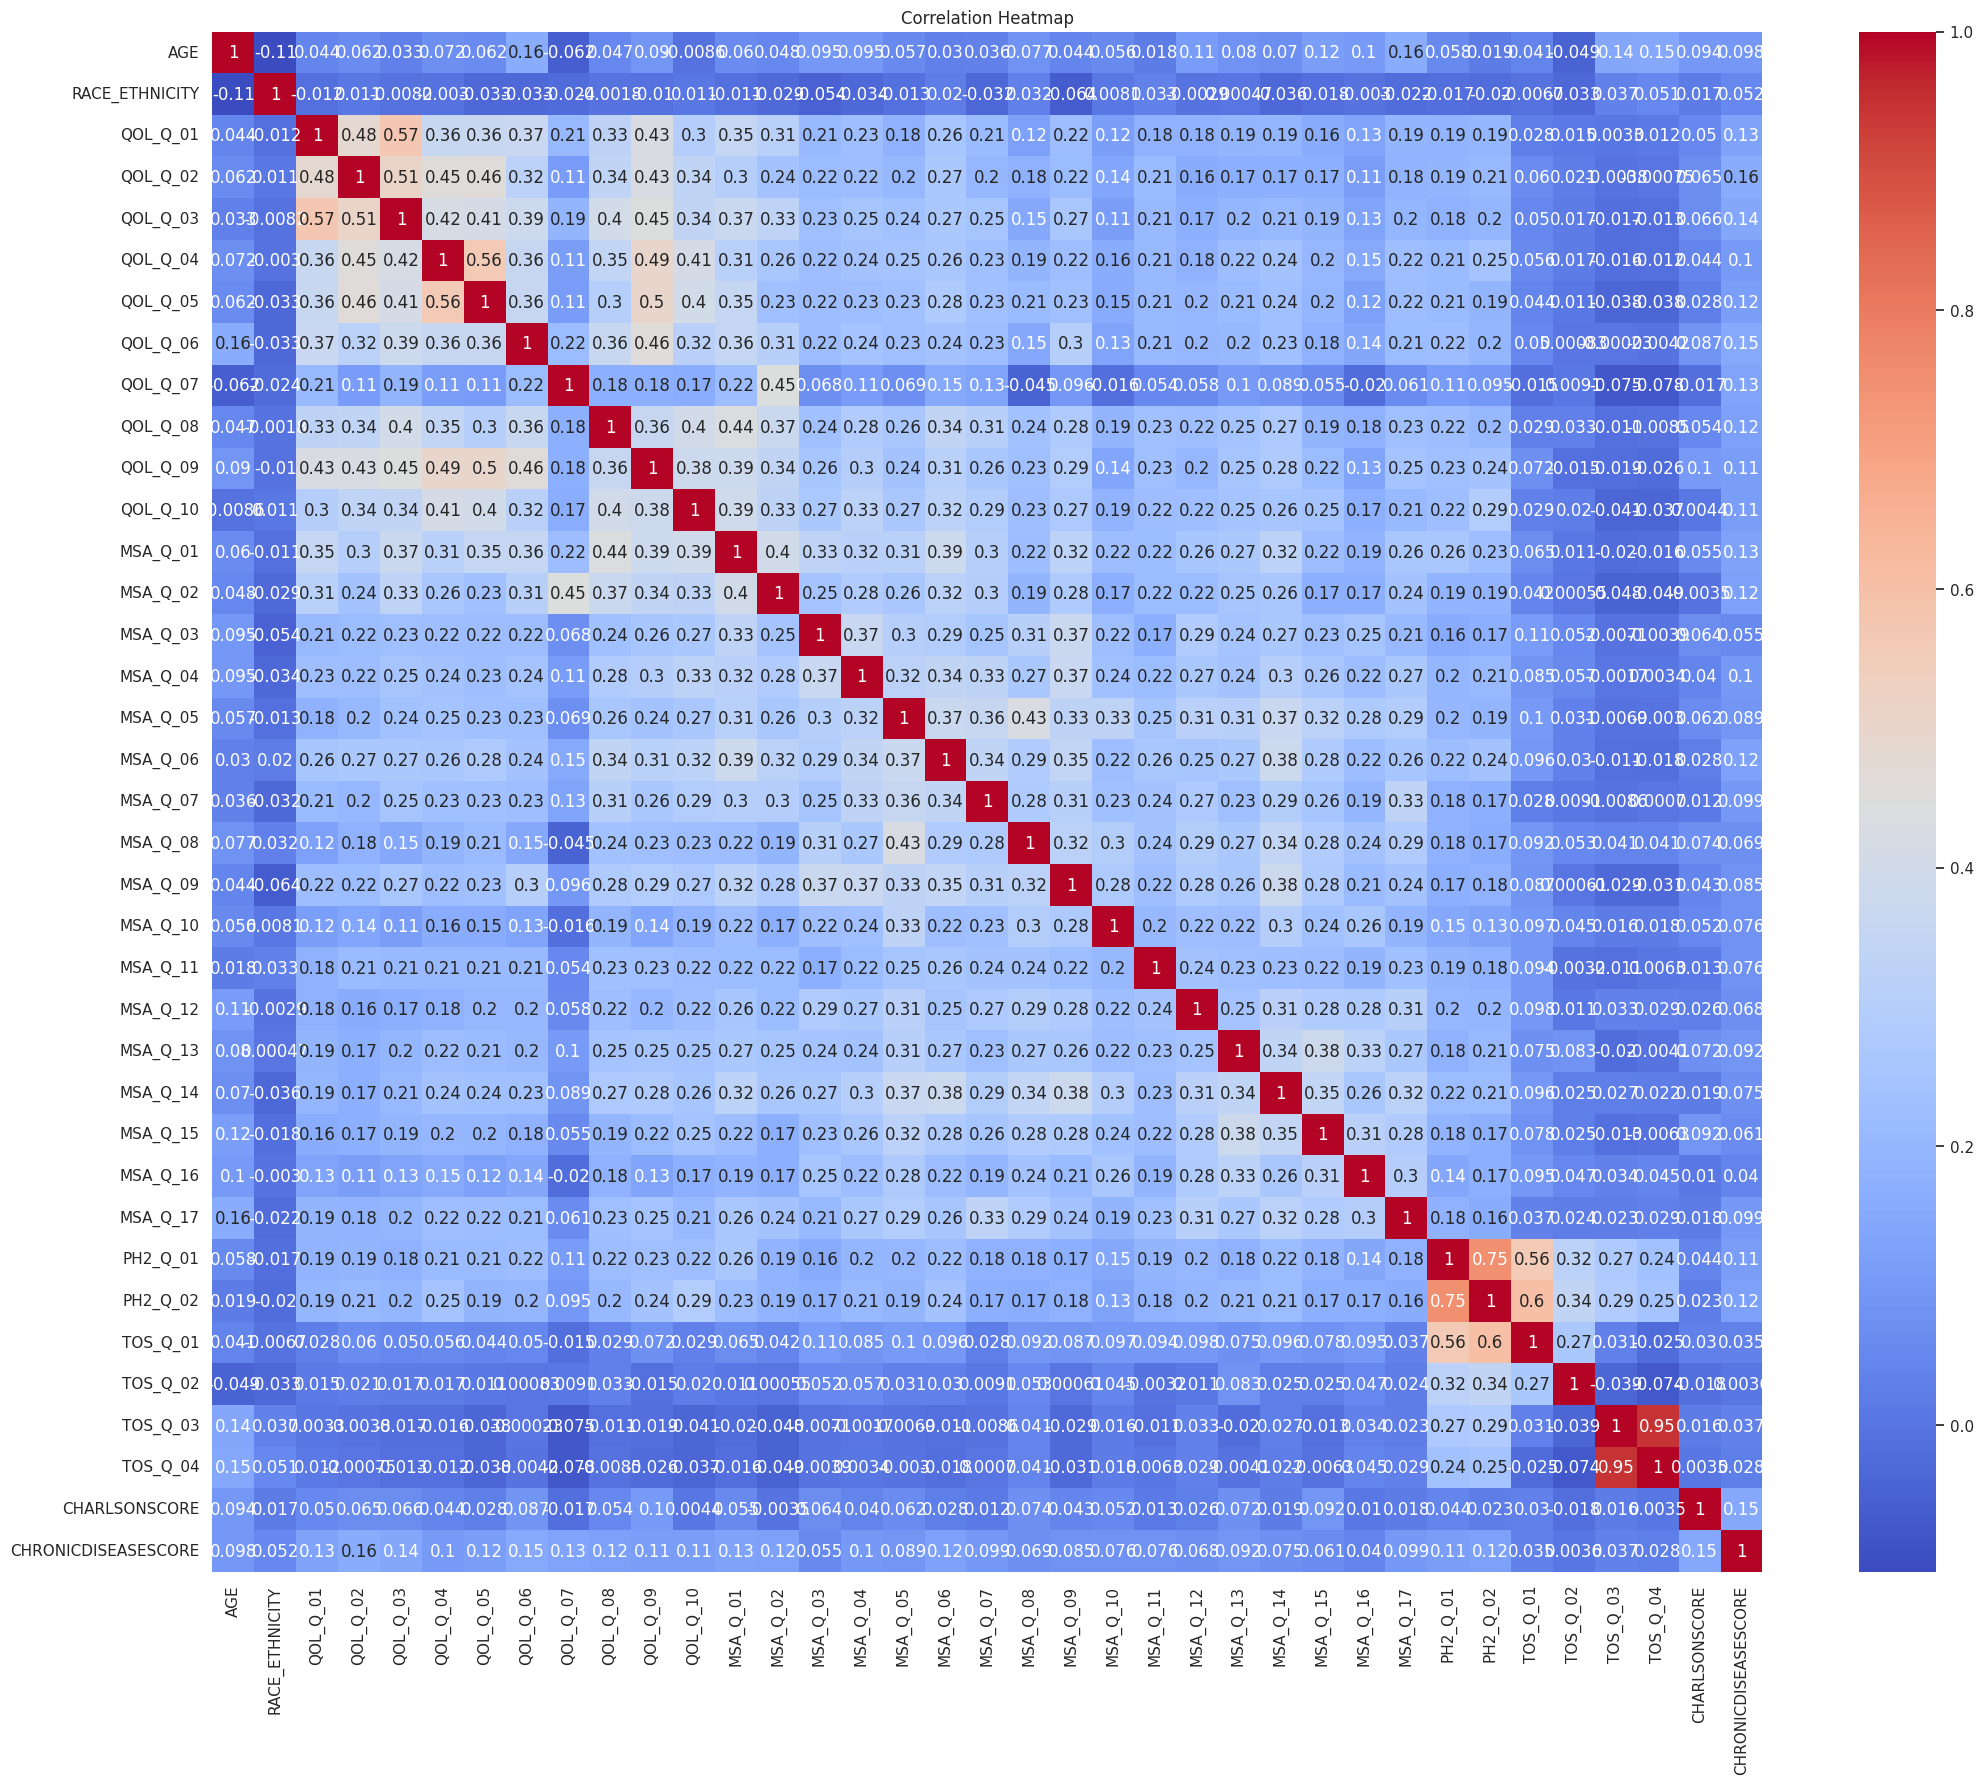

In [325]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Some Graphs for the Descriptive Analysis**

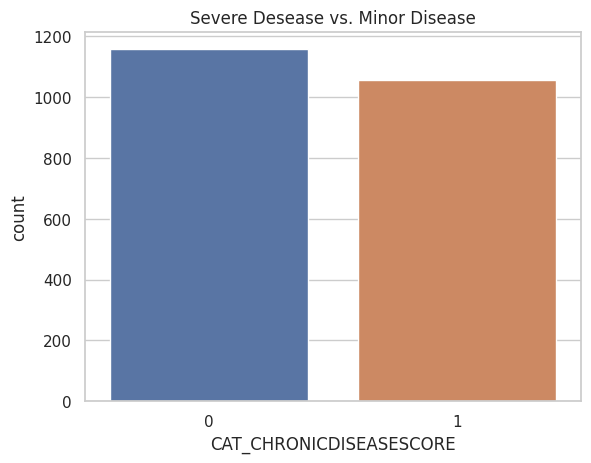

In [326]:
sns.countplot(data, x='CAT_CHRONICDISEASESCORE')
plt.title('Severe Desease vs. Minor Disease')
plt.show()

In [327]:
# Assuming 'categorical_column' is the column you want to count
class_counts = data['CAT_CHRONICDISEASESCORE'].value_counts()
print(class_counts)

0    1158
1    1056
Name: CAT_CHRONICDISEASESCORE, dtype: int64


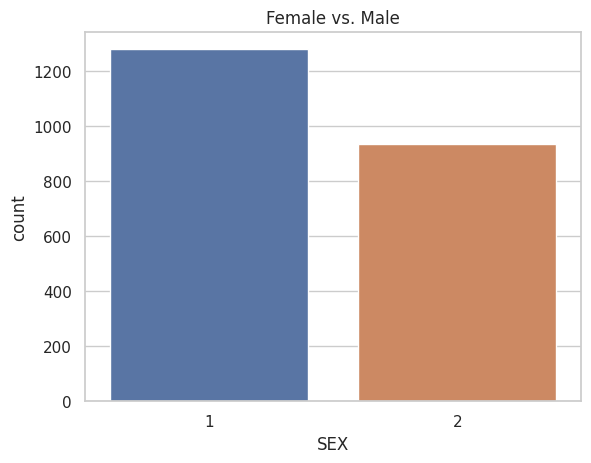

1    1280
2     934
Name: SEX, dtype: int64


In [328]:
sns.countplot(data, x='SEX')
plt.title('Female vs. Male')
plt.show()
# Assuming 'categorical_column' is the column you want to count
sex = data['SEX'].value_counts()
print(sex)

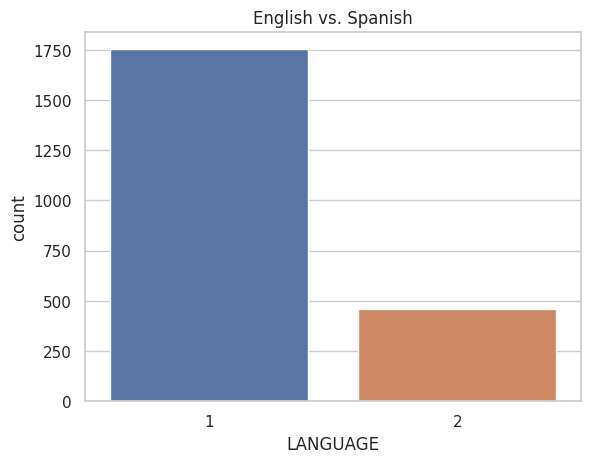

1    1753
2     461
Name: LANGUAGE, dtype: int64


In [329]:
sns.countplot(data, x='LANGUAGE')
plt.title('English vs. Spanish')
plt.show()
# Assuming 'categorical_column' is the column you want to count
lang = data['LANGUAGE'].value_counts()
print(lang)

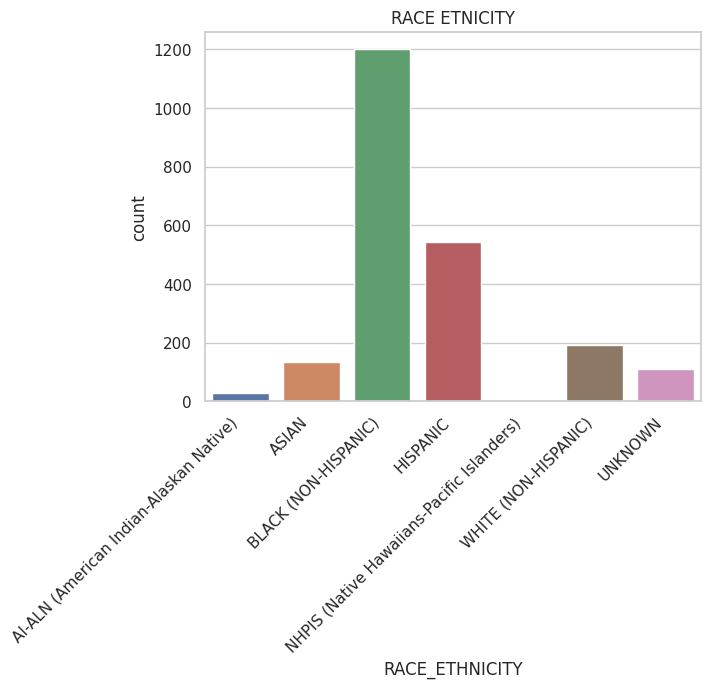

3    1200
4     542
6     192
2     135
7     109
1      30
5       6
Name: RACE_ETHNICITY, dtype: int64


In [330]:
# Create a countplot and set custom x-axis labels
sns.set(style="whitegrid")  # Optional style setting
ax = sns.countplot(data=data, x='RACE_ETHNICITY')

# Define the custom x-axis labels
custom_labels = [
    'AI-ALN (American Indian-Alaskan Native)',
    'ASIAN',
    'BLACK (NON-HISPANIC)',
    'HISPANIC',
    'NHPIS (Native Hawaiians-Pacific Islanders)',
    'WHITE (NON-HISPANIC)',
    'UNKNOWN'
]

# Set the custom x-axis labels
ax.set_xticklabels(custom_labels, rotation=45, ha="right")

# Add a title
plt.title('RACE ETNICITY')

# Show the plot
plt.show()

race = data['RACE_ETHNICITY'].value_counts()
print(race)

# Train and Test

In [331]:
data=data.drop(columns=['ID','INTERVIEWDATE'])

In [332]:
# Assuming you have a target variable 'target_column_name' that you want to predict.
X = data.drop(columns=['CAT_CHRONICDISEASESCORE'])
y = data['CAT_CHRONICDISEASESCORE']  # Target variable

# Perform the stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X

,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,QOL_Q_05,QOL_Q_06,...,MSA_Q_16,MSA_Q_17,PH2_Q_01,PH2_Q_02,TOS_Q_01,TOS_Q_02,TOS_Q_03,TOS_Q_04,CHARLSONSCORE,CHRONICDISEASESCORE
0,1,49,3,2,4,4,4,4,1,4,...,2,2,3,4,2,1,4,5,2,1.60
1,1,49,3,2,4,3,4,4,5,4,...,3,1,2,4,2,1,4,5,2,1.60
2,1,62,3,2,3,3,4,2,4,2,...,5,1,1,1,2,1,4,5,3,1.54
3,1,44,7,2,6,6,6,6,6,6,...,6,6,5,5,4,4,4,5,1,2.97
4,1,64,3,1,3,2,3,3,2,1,...,1,1,1,1,1,4,4,5,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2,60,4,1,4,4,4,3,3,4,...,2,1,2,2,1,4,4,5,1,2.54
2352,1,81,4,1,3,4,3,5,4,2,...,2,1,3,2,1,4,4,5,0,0.34
2353,1,40,3,1,4,3,4,4,3,4,...,1,1,4,1,1,4,4,5,1,0.63
2354,1,54,4,1,4,2,3,3,3,3,...,1,1,1,1,1,4,4,5,0,0.86


In [ ]:
y

0       1
1       1
2       1
3       1
4       0
       ..
2351    1
2352    0
2353    0
2354    0
2355    0
Name: CAT_CHRONICDISEASESCORE, Length: 2214, dtype: int64


# **LOGISTIC REGRESSION MODEL WITH ALL THE VARIABLES**

In [ ]:
# Add a constant term to the features (intercept)
X_train = sm.add_constant(X_train)

# Create a logistic regression model using GLM
logistic= sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = logistic.fit()
# Print the summary of the model to check for significant predictor variables
print(results.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     CAT_CHRONICDISEASESCORE   No. Observations:                 1771
Model:                                 GLM   Df Residuals:                     1731
Model Family:                     Binomial   Df Model:                           39
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                    nan
Date:                     Mon, 16 Oct 2023   Deviance:                   2.8540e-09
Time:                             17:05:16   Pearson chi2:                 1.43e-09
No. Iterations:                         31   Pseudo R-squ. (CS):                nan
Covariance Type:                 nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparat

In [ ]:
# Add the same constant term to the X_test matrix
X_test = sm.add_constant(X_test)

In [ ]:
X_train

,const,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,QOL_Q_05,...,MSA_Q_16,MSA_Q_17,PH2_Q_01,PH2_Q_02,TOS_Q_01,TOS_Q_02,TOS_Q_03,TOS_Q_04,CHARLSONSCORE,CHRONICDISEASESCORE
2212,1.0,1,63,3,2,3,2,3,1,2,...,1,1,1,1,3,4,1,3,2,1.97
532,1.0,1,82,3,1,4,5,4,4,3,...,1,2,1,1,2,1,4,5,3,1.24
2171,1.0,2,62,4,1,4,4,4,3,3,...,1,2,1,1,2,1,4,5,1,1.06
1853,1.0,1,59,3,1,3,3,3,2,2,...,1,1,1,1,2,1,4,5,0,0.74
1989,1.0,1,50,6,2,4,4,4,3,3,...,6,6,2,5,1,4,4,5,1,2.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,1.0,1,54,6,2,4,3,3,3,3,...,1,6,5,5,1,4,4,5,1,1.90
1410,1.0,1,64,3,1,5,4,5,4,3,...,1,1,1,1,2,1,4,5,0,2.14
71,1.0,1,62,6,1,3,3,3,2,3,...,1,1,2,1,2,1,4,5,2,1.60
1924,1.0,1,55,3,1,2,2,3,2,3,...,1,1,1,1,2,2,4,5,0,1.51


In [ ]:
X_test ## Do I have to add the constant term also to my X_test?

,const,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,QOL_Q_05,...,MSA_Q_16,MSA_Q_17,PH2_Q_01,PH2_Q_02,TOS_Q_01,TOS_Q_02,TOS_Q_03,TOS_Q_04,CHARLSONSCORE,CHRONICDISEASESCORE
736,1.0,1,40,3,2,4,3,5,1,1,...,5,1,1,5,1,4,4,5,-9,0.34
2336,1.0,1,56,3,2,4,4,4,4,2,...,1,1,1,1,2,1,4,5,0,0.48
1573,1.0,1,56,3,1,3,3,3,1,2,...,1,2,1,2,1,4,4,5,0,0.60
1124,1.0,2,46,4,1,4,4,4,5,4,...,1,2,3,4,1,4,4,5,0,1.15
2143,1.0,2,57,4,2,3,3,3,3,3,...,1,1,1,1,1,4,4,5,0,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,1.0,2,44,4,1,4,3,4,4,3,...,1,4,2,3,1,4,4,5,0,0.54
2039,1.0,1,61,3,1,4,4,4,1,5,...,1,1,4,5,2,3,4,5,0,0.74
1493,1.0,1,57,2,1,3,3,3,2,1,...,1,1,1,1,1,4,4,5,0,1.65
849,1.0,1,64,6,2,4,5,4,4,4,...,2,1,4,4,2,2,4,5,4,2.45


In [ ]:
y_test

736     0
2336    0
1573    0
1124    0
2143    0
       ..
1609    0
2039    0
1493    1
849     1
1131    0
Name: CAT_CHRONICDISEASESCORE, Length: 443, dtype: int64

In [ ]:
# Make predictions on the X_test data ( Here we calculate the predictions)
predictions = results.predict(exog=X_test)

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [ ]:
predictions

736     1.069543e-298
2336    1.515424e-282
1573    1.482391e-245
1124     1.771205e-91
2143    2.275468e-279
            ...      
1609    9.434295e-247
2039    5.401828e-193
1493     1.000000e+00
849      1.000000e+00
1131     4.058754e-94
Length: 443, dtype: float64

In [ ]:
y_test

736     0
2336    0
1573    0
1124    0
2143    0
       ..
1609    0
2039    0
1493    1
849     1
1131    0
Name: CAT_CHRONICDISEASESCORE, Length: 443, dtype: int64

In [ ]:
# Convert predicted probabilities to binary labels using a threshold (e.g., 0.5) ( Here we set the threshold to get probabilities)
y_pred = (predictions > 0.5).astype(int)

In [ ]:
y_pred

736     0
2336    0
1573    0
1124    0
2143    0
       ..
1609    0
2039    0
1493    1
849     1
1131    0
Length: 443, dtype: int64

In [ ]:
# Calculate sensitivity, specificity, and accuracy
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn,fp,fn,tp)

(232, 0, 2, 209)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[232,   0],
       [  2, 209]])

In [ ]:
## Here we are going to calculate sensitivity, specificity, and accuracy
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)

Sensitivity: 0.990521327014218
Specificity: 1.0
Accuracy: 0.9954853273137697


In [ ]:
# 3. Calculate the AUC based on the predicted probabilities and true labels
auc = roc_auc_score(y_test, y_pred)
auc

0.9952606635071091

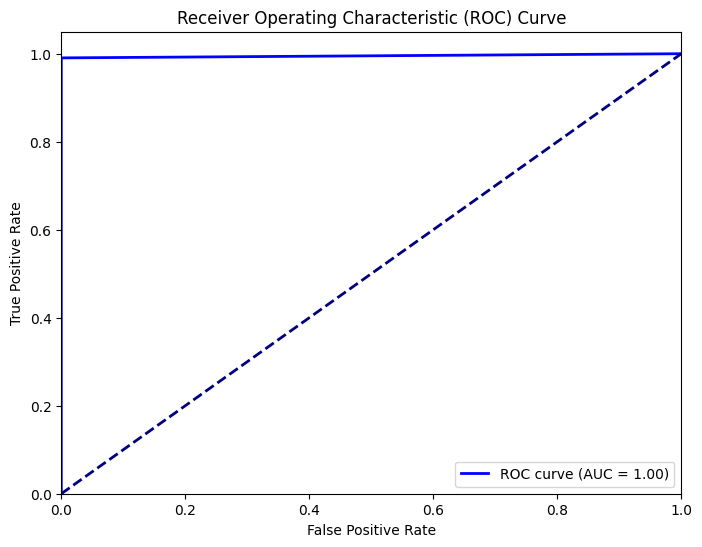

In [ ]:
# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**LOGISTIC REGRESSION MODEL 1**

In [114]:
columns_to_include1 = ['LANGUAGE', 'AGE', 'RACE_ETHNICITY', 'SEX','QOL_Q_01', 'QOL_Q_02',
       'QOL_Q_03', 'QOL_Q_04', 'QOL_Q_05', 'QOL_Q_06', 'QOL_Q_07', 'QOL_Q_08',
       'QOL_Q_09', 'QOL_Q_10',
       'CAT_CHRONICDISEASESCORE']

df_selected1 = data[columns_to_include1]

In [115]:
df_selected1

,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,QOL_Q_05,QOL_Q_06,QOL_Q_07,QOL_Q_08,QOL_Q_09,QOL_Q_10,CAT_CHRONICDISEASESCORE
0,1,49,3,2,4,4,4,4,1,4,1,6,3,3,1
1,1,49,3,2,4,3,4,4,5,4,2,1,4,1,1
2,1,62,3,2,3,3,4,2,4,2,5,3,3,3,1
3,1,44,7,2,6,6,6,6,6,6,-1,6,6,6,1
4,1,64,3,1,3,2,3,3,2,1,0,6,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2,60,4,1,4,4,4,3,3,4,10,3,3,3,1
2352,1,81,4,1,3,4,3,5,4,2,4,3,2,4,0
2353,1,40,3,1,4,3,4,4,3,4,7,3,4,1,0
2354,1,54,4,1,4,2,3,3,3,3,2,2,2,1,0


In [116]:
X = df_selected1.drop('CAT_CHRONICDISEASESCORE', axis=1)  # Features
y = df_selected1['CAT_CHRONICDISEASESCORE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
# Add a constant term to the features (intercept)
X_train = sm.add_constant(X_train)

# Create a logistic regression model using GLM
logistic1= sm.GLM(y_train, X_train, family=sm.families.Binomial())
results1 = logistic1.fit()
# Print the summary of the model to check for significant predictor variables
print(results1.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     CAT_CHRONICDISEASESCORE   No. Observations:                 1771
Model:                                 GLM   Df Residuals:                     1756
Model Family:                     Binomial   Df Model:                           14
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -1187.1
Date:                     Tue, 17 Oct 2023   Deviance:                       2374.2
Time:                             21:39:23   Pearson chi2:                 1.77e+03
No. Iterations:                          4   Pseudo R-squ. (CS):            0.04153
Covariance Type:                 nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [118]:
# Add the same constant term to the X_test matrix
X_test = sm.add_constant(X_test)
# Make predictions on the X_test data ( Here we calculate the predictions)
predictions1 = results1.predict(exog=X_test)
# Convert predicted probabilities to binary labels using a threshold (e.g., 0.5) ( Here we set the threshold to get probabilities)
y_pred = (predictions1 > 0.5).astype(int)
# Calculate sensitivity, specificity, and accuracy
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, y_pred).ravel()
(tn1,fp1,fn1,tp1)


(158, 64, 112, 109)

In [119]:
## Here we are going to calculate sensitivity, specificity, and accuracy
sensitivity = tp1 / (tp1 + fn1)
specificity = tn1 / (tn1 + fp1)
accuracy = (tp1 + tn1) / (tp1 + tn1 + fp1 + fn1)

# Print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)

Sensitivity: 0.49321266968325794
Specificity: 0.7117117117117117
Accuracy: 0.6027088036117382


**LOGISTIC REGRESSION MODEL 2**





In [120]:
columns_to_include2 = ['LANGUAGE', 'AGE', 'RACE_ETHNICITY', 'SEX','MSA_Q_01', 'MSA_Q_02', 'MSA_Q_03', 'MSA_Q_04',
       'MSA_Q_05', 'MSA_Q_06', 'MSA_Q_07', 'MSA_Q_08', 'MSA_Q_09', 'MSA_Q_10',
       'MSA_Q_11', 'MSA_Q_12', 'MSA_Q_13', 'MSA_Q_14', 'MSA_Q_15', 'MSA_Q_16',
       'MSA_Q_17','CAT_CHRONICDISEASESCORE']

df_selected2 = data[columns_to_include2]

In [121]:
df_selected2

,LANGUAGE,AGE,RACE_ETHNICITY,SEX,MSA_Q_01,MSA_Q_02,MSA_Q_03,MSA_Q_04,MSA_Q_05,MSA_Q_06,...,MSA_Q_09,MSA_Q_10,MSA_Q_11,MSA_Q_12,MSA_Q_13,MSA_Q_14,MSA_Q_15,MSA_Q_16,MSA_Q_17,CAT_CHRONICDISEASESCORE
0,1,49,3,2,1,1,2,1,1,1,...,1,1,2,1,1,1,2,2,2,1
1,1,49,3,2,3,1,1,3,1,2,...,1,1,3,1,1,1,1,3,1,1
2,1,62,3,2,2,2,2,2,1,2,...,1,1,2,2,1,1,1,5,1,1
3,1,44,7,2,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,1
4,1,64,3,1,2,1,1,1,1,1,...,2,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2,60,4,1,3,4,2,3,1,1,...,2,1,1,2,2,1,3,2,1,1
2352,1,81,4,1,3,4,1,2,4,2,...,2,1,2,1,3,4,3,2,1,0
2353,1,40,3,1,4,1,1,2,1,4,...,3,1,1,1,1,1,1,1,1,0
2354,1,54,4,1,3,2,3,2,1,2,...,2,1,1,1,1,1,1,1,1,0


In [122]:
X = df_selected2.drop('CAT_CHRONICDISEASESCORE', axis=1)  # Features
y = df_selected2['CAT_CHRONICDISEASESCORE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Add a constant term to the features (intercept)
X_train = sm.add_constant(X_train)

# Create a logistic regression model using GLM
logistic2= sm.GLM(y_train, X_train, family=sm.families.Binomial())
results2 = logistic2.fit()
# Print the summary of the model to check for significant predictor variables
print(results2.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     CAT_CHRONICDISEASESCORE   No. Observations:                 1771
Model:                                 GLM   Df Residuals:                     1749
Model Family:                     Binomial   Df Model:                           21
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -1196.0
Date:                     Tue, 17 Oct 2023   Deviance:                       2392.0
Time:                             21:41:33   Pearson chi2:                 1.77e+03
No. Iterations:                          4   Pseudo R-squ. (CS):            0.03188
Covariance Type:                 nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [125]:
# Add the same constant term to the X_test matrix
X_test = sm.add_constant(X_test)
# Make predictions on the X_test data ( Here we calculate the predictions)
predictions2 = results2.predict(exog=X_test)
# Convert predicted probabilities to binary labels using a threshold (e.g., 0.5) ( Here we set the threshold to get probabilities)
y_pred = (predictions2 > 0.5).astype(int)
# Calculate sensitivity, specificity, and accuracy
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred).ravel()
(tn2,fp2,fn2,tp2)

(157, 65, 136, 85)

In [126]:
## Here we are going to calculate sensitivity, specificity, and accuracy
sensitivity = tp2 / (tp2 + fn2)
specificity = tn2 / (tn2 + fp2)
accuracy = (tp2 + tn2) / (tp2 + tn2 + fp2 + fn2)

# Print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)

Sensitivity: 0.38461538461538464
Specificity: 0.7072072072072072
Accuracy: 0.54627539503386


**LOGISTIC REGRESSION MODEL 3**

In [134]:
columns_to_include3 = ['LANGUAGE', 'AGE', 'RACE_ETHNICITY', 'SEX','PH2_Q_01','PH2_Q_02', 'TOS_Q_02', 'TOS_Q_03',
       'TOS_Q_04','CAT_CHRONICDISEASESCORE']

df_selected3 = data[columns_to_include3]

In [135]:
df_selected3

,LANGUAGE,AGE,RACE_ETHNICITY,SEX,PH2_Q_01,PH2_Q_02,TOS_Q_02,TOS_Q_03,TOS_Q_04,CAT_CHRONICDISEASESCORE
0,1,49,3,2,3,4,1,4,5,1
1,1,49,3,2,2,4,1,4,5,1
2,1,62,3,2,1,1,1,4,5,1
3,1,44,7,2,5,5,4,4,5,1
4,1,64,3,1,1,1,4,4,5,0
...,...,...,...,...,...,...,...,...,...,...
2351,2,60,4,1,2,2,4,4,5,1
2352,1,81,4,1,3,2,4,4,5,0
2353,1,40,3,1,4,1,4,4,5,0
2354,1,54,4,1,1,1,4,4,5,0


In [136]:
X = df_selected3.drop('CAT_CHRONICDISEASESCORE', axis=1)  # Features
y = df_selected3['CAT_CHRONICDISEASESCORE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
# Add a constant term to the features (intercept)
X_train = sm.add_constant(X_train)

# Create a logistic regression model using GLM
logistic3= sm.GLM(y_train, X_train, family=sm.families.Binomial())
results3 = logistic3.fit()
# Print the summary of the model to check for significant predictor variables
print(results3.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     CAT_CHRONICDISEASESCORE   No. Observations:                 1771
Model:                                 GLM   Df Residuals:                     1761
Model Family:                     Binomial   Df Model:                            9
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -1200.1
Date:                     Tue, 17 Oct 2023   Deviance:                       2400.1
Time:                             21:44:03   Pearson chi2:                 1.77e+03
No. Iterations:                          4   Pseudo R-squ. (CS):            0.02741
Covariance Type:                 nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [139]:
# Add the same constant term to the X_test matrix
X_test = sm.add_constant(X_test)
# Make predictions on the X_test data ( Here we calculate the predictions)
predictions3 = results3.predict(exog=X_test)
# Convert predicted probabilities to binary labels using a threshold (e.g., 0.5) ( Here we set the threshold to get probabilities)
y_pred = (predictions3 > 0.5).astype(int)
# Calculate sensitivity, specificity, and accuracy
tn3, fp3, fn3, tp3 = confusion_matrix(y_test, y_pred).ravel()
(tn3,fp3,fn3,tp3)

(152, 70, 130, 91)

In [140]:
## Here we are going to calculate sensitivity, specificity, and accuracy
sensitivity = tp3 / (tp3 + fn3)
specificity = tn3 / (tn3 + fp3)
accuracy = (tp3 + tn3) / (tp3 + tn3 + fp3 + fn3)

# Print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)

Sensitivity: 0.4117647058823529
Specificity: 0.6846846846846847
Accuracy: 0.5485327313769752


**LOGISTIC REGRESSION MODEL 4**

In [198]:
columns_to_include4 = ['LANGUAGE', 'AGE', 'RACE_ETHNICITY', 'QOL_Q_05','QOL_Q_07',
       'PH2_Q_02','CAT_CHRONICDISEASESCORE']

df_selected4 = data[columns_to_include4]
X = df_selected4.drop('CAT_CHRONICDISEASESCORE', axis=1)  # Features
y = df_selected4['CAT_CHRONICDISEASESCORE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Add a constant term to the features (intercept)
X_train = sm.add_constant(X_train)

# Create a logistic regression model using GLM
logistic4= sm.GLM(y_train, X_train, family=sm.families.Binomial())
results4 = logistic4.fit()
# Print the summary of the model to check for significant predictor variables
print(results4.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     CAT_CHRONICDISEASESCORE   No. Observations:                 1771
Model:                                 GLM   Df Residuals:                     1764
Model Family:                     Binomial   Df Model:                            6
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -1189.5
Date:                     Tue, 17 Oct 2023   Deviance:                       2378.9
Time:                             22:12:32   Pearson chi2:                 1.77e+03
No. Iterations:                          4   Pseudo R-squ. (CS):            0.03900
Covariance Type:                 nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [194]:
# Add the same constant term to the X_test matrix
X_test = sm.add_constant(X_test)
# Make predictions on the X_test data ( Here we calculate the predictions)
predictions4 = results4.predict(exog=X_test)
# Convert predicted probabilities to binary labels using a threshold (e.g., 0.5) ( Here we set the threshold to get probabilities)
y_pred4 = (predictions4 > 0.5).astype(int)
# Calculate sensitivity, specificity, and accuracy
tn4, fp4, fn4, tp4 = confusion_matrix(y_test, y_pred).ravel()
(tn4,fp4,fn4,tp4)

(159, 63, 114, 107)

In [195]:
## Here we are going to calculate sensitivity, specificity, and accuracy
sensitivity = tp4 / (tp4 + fn4)
specificity = tn4 / (tn4 + fp4)
accuracy = (tp4 + tn4) / (tp4 + tn4 + fp4 + fn4)

# Print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)

Sensitivity: 0.4841628959276018
Specificity: 0.7162162162162162
Accuracy: 0.600451467268623


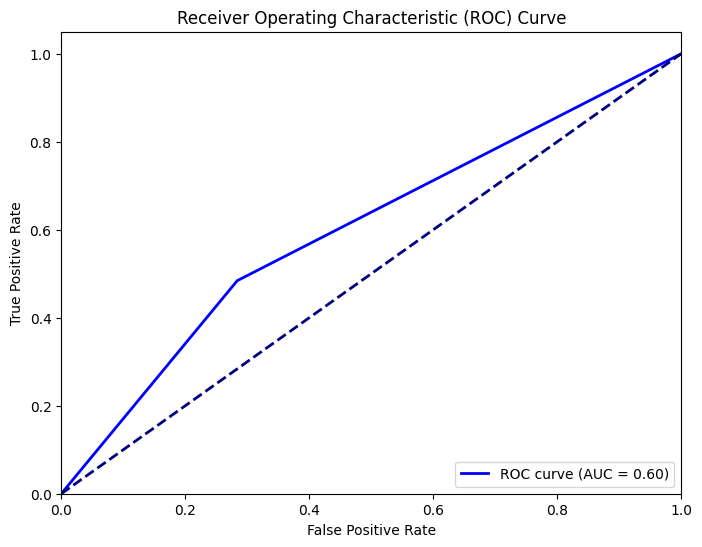

In [197]:
# 3. Calculate the AUC based on the predicted probabilities and true labels
auc = roc_auc_score(y_test, y_pred4)
auc
# Calculate the ROC curve
fpr4, tpr4, _ = roc_curve(y_test, y_pred4)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr4, tpr4, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**LOGISTIC REGRESSION MODEL 5**

In [152]:
# Get the column names and print them
column_names = data.columns
print(column_names)

Index(['LANGUAGE', 'AGE', 'RACE_ETHNICITY', 'SEX', 'QOL_Q_01', 'QOL_Q_02',
       'QOL_Q_03', 'QOL_Q_04', 'QOL_Q_05', 'QOL_Q_06', 'QOL_Q_07', 'QOL_Q_08',
       'QOL_Q_09', 'QOL_Q_10', 'MSA_Q_01', 'MSA_Q_02', 'MSA_Q_03', 'MSA_Q_04',
       'MSA_Q_05', 'MSA_Q_06', 'MSA_Q_07', 'MSA_Q_08', 'MSA_Q_09', 'MSA_Q_10',
       'MSA_Q_11', 'MSA_Q_12', 'MSA_Q_13', 'MSA_Q_14', 'MSA_Q_15', 'MSA_Q_16',
       'MSA_Q_17', 'PH2_Q_01', 'PH2_Q_02', 'TOS_Q_01', 'TOS_Q_02', 'TOS_Q_03',
       'TOS_Q_04', 'CHARLSONSCORE', 'CHRONICDISEASESCORE',
       'CAT_CHRONICDISEASESCORE'],
      dtype='object')


In [185]:
columns_to_include5 = ['LANGUAGE', 'AGE', 'RACE_ETHNICITY', 'SEX', 'QOL_Q_05','QOL_Q_07', 'QOL_Q_08',
        'PH2_Q_02', 'CHARLSONSCORE', 'CHRONICDISEASESCORE','CAT_CHRONICDISEASESCORE']

df_selected5 = data[columns_to_include5]
X = df_selected5.drop('CAT_CHRONICDISEASESCORE', axis=1)  # Features
y = df_selected5['CAT_CHRONICDISEASESCORE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Add a constant term to the features (intercept)
X_train = sm.add_constant(X_train)

# Create a logistic regression model using GLM
logistic5= sm.GLM(y_train, X_train, family=sm.families.Binomial())
results5 = logistic5.fit()
# Print the summary of the model to check for significant predictor variables
print(results5.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     CAT_CHRONICDISEASESCORE   No. Observations:                 1771
Model:                                 GLM   Df Residuals:                     1760
Model Family:                     Binomial   Df Model:                           10
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                    nan
Date:                     Tue, 17 Oct 2023   Deviance:                   5.4705e-09
Time:                             22:05:37   Pearson chi2:                 2.74e-09
No. Iterations:                         32   Pseudo R-squ. (CS):                nan
Covariance Type:                 nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparat

In [186]:
# Add the same constant term to the X_test matrix
X_test = sm.add_constant(X_test)
# Make predictions on the X_test data ( Here we calculate the predictions)
predictions5 = results5.predict(exog=X_test)
# Convert predicted probabilities to binary labels using a threshold (e.g., 0.5) ( Here we set the threshold to get probabilities)
y_pred = (predictions5 > 0.5).astype(int)
# Calculate sensitivity, specificity, and accuracy
tn5, fp5, fn5, tp5 = confusion_matrix(y_test, y_pred).ravel()
(tn5,fp5,fn5,tp5)

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


(222, 0, 0, 221)

In [187]:
## Here we are going to calculate sensitivity, specificity, and accuracy
sensitivity = tp5 / (tp5 + fn5)
specificity = tn5 / (tn5 + fp5)
accuracy = (tp5 + tn5) / (tp5 + tn5 + fp5 + fn5)

# Print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)

Sensitivity: 1.0
Specificity: 1.0
Accuracy: 1.0


**LOGISTIC REGRESSION MODEL 6**

In [188]:
columns_to_include6 = ['LANGUAGE', 'AGE', 'RACE_ETHNICITY','QOL_Q_01', 'QOL_Q_02',
       'QOL_Q_03', 'QOL_Q_04', 'QOL_Q_05',  'QOL_Q_07', 'TOS_Q_02',
      'QOL_Q_10', 'PH2_Q_02',
       'CAT_CHRONICDISEASESCORE']
df_selected6 = data[columns_to_include6]
X = df_selected6.drop('CAT_CHRONICDISEASESCORE', axis=1)  # Features
y = df_selected6['CAT_CHRONICDISEASESCORE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Add a constant term to the features (intercept)
X_train = sm.add_constant(X_train)

# Create a logistic regression model using GLM
logistic6= sm.GLM(y_train, X_train, family=sm.families.Binomial())
results6 = logistic6.fit()
# Print the summary of the model to check for significant predictor variables
print(results6.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     CAT_CHRONICDISEASESCORE   No. Observations:                 1771
Model:                                 GLM   Df Residuals:                     1758
Model Family:                     Binomial   Df Model:                           12
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -1185.5
Date:                     Tue, 17 Oct 2023   Deviance:                       2371.1
Time:                             22:07:27   Pearson chi2:                 1.77e+03
No. Iterations:                          4   Pseudo R-squ. (CS):            0.04325
Covariance Type:                 nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [189]:
# Add the same constant term to the X_test matrix
X_test = sm.add_constant(X_test)
# Make predictions on the X_test data ( Here we calculate the predictions)
predictions6 = results6.predict(exog=X_test)
# Convert predicted probabilities to binary labels using a threshold (e.g., 0.5) ( Here we set the threshold to get probabilities)
y_pred = (predictions6 > 0.5).astype(int)
# Calculate sensitivity, specificity, and accuracy
tn6, fp6, fn6, tp6 = confusion_matrix(y_test, y_pred).ravel()
(tn6,fp6,fn6,tp6)

(159, 63, 114, 107)

In [190]:
## Here we are going to calculate sensitivity, specificity, and accuracy
sensitivity = tp6 / (tp6 + fn6)
specificity = tn6 / (tn6 + fp6)
accuracy = (tp6 + tn6) / (tp6 + tn6 + fp6 + fn6)

# Print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)

Sensitivity: 0.4841628959276018
Specificity: 0.7162162162162162
Accuracy: 0.600451467268623


# **LINEAR  AND QUADRATIC DISCRIMINANT ANALYSIS**

In [333]:
# Assuming you have a target variable 'target_column_name' that you want to predict.
X = data.drop(columns=['CAT_CHRONICDISEASESCORE'])
y = data['CAT_CHRONICDISEASESCORE']  # Target variable

# Perform the stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [334]:
# First we will normalize our Training set
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [335]:
lda = LinearDiscriminantAnalysis()
resultslda=lda.fit(X_train_normalized, y_train)
qda = QuadraticDiscriminantAnalysis()
resultsqda=qda.fit(X_train_normalized, y_train)

In [336]:
ldapriors=resultslda.priors_
ldameans=resultslda.means_
ldacoefficients = resultslda.scalings_
ldapriors,ldameans,ldacoefficients

(array([0.52286844, 0.47713156]),
 array([[-3.80199700e-02, -1.02036434e-01, -3.52911448e-02,
          1.40329240e-02, -9.73996779e-02, -1.03253762e-01,
         -9.67385320e-02, -7.94879146e-02, -8.63857849e-02,
         -9.92990501e-02, -1.18277152e-01, -7.99109856e-02,
         -8.04624032e-02, -6.38182914e-02, -7.42396796e-02,
         -8.91784425e-02, -5.53177665e-02, -6.79455979e-02,
         -4.85072017e-02, -8.22034047e-02, -4.70546124e-02,
         -6.02274211e-02, -7.24124813e-02, -5.16851609e-02,
         -4.35417402e-02, -4.57550216e-02, -4.41003236e-02,
         -4.97063406e-02, -4.35200725e-02, -1.70775831e-02,
         -7.23626210e-02, -7.78261575e-02, -9.38228564e-02,
         -3.42222070e-02, -6.71358677e-04, -1.39961638e-02,
         -7.06958952e-03, -1.20150992e-01, -7.78329482e-01],
        [ 4.16644878e-02,  1.11817442e-01,  3.86740829e-02,
         -1.53780919e-02,  1.06736215e-01,  1.13151460e-01,
          1.06011693e-01,  8.71074661e-02,  9.46665524e-02,
     

In [337]:
qdapriors=resultsqda.priors_
qdameans=resultsqda.means_
qdacoefficients = resultsqda.scalings_
qdapriors,qdameans,qdacoefficients

(array([0.52286844, 0.47713156]),
 array([[-3.80199700e-02, -1.02036434e-01, -3.52911448e-02,
          1.40329240e-02, -9.73996779e-02, -1.03253762e-01,
         -9.67385320e-02, -7.94879146e-02, -8.63857849e-02,
         -9.92990501e-02, -1.18277152e-01, -7.99109856e-02,
         -8.04624032e-02, -6.38182914e-02, -7.42396796e-02,
         -8.91784425e-02, -5.53177665e-02, -6.79455979e-02,
         -4.85072017e-02, -8.22034047e-02, -4.70546124e-02,
         -6.02274211e-02, -7.24124813e-02, -5.16851609e-02,
         -4.35417402e-02, -4.57550216e-02, -4.41003236e-02,
         -4.97063406e-02, -4.35200725e-02, -1.70775831e-02,
         -7.23626210e-02, -7.78261575e-02, -9.38228564e-02,
         -3.42222070e-02, -6.71358677e-04, -1.39961638e-02,
         -7.06958952e-03, -1.20150992e-01, -7.78329482e-01],
        [ 4.16644878e-02,  1.11817442e-01,  3.86740829e-02,
         -1.53780919e-02,  1.06736215e-01,  1.13151460e-01,
          1.06011693e-01,  8.71074661e-02,  9.46665524e-02,
     

10. Now we will Calculate the predictions for the Linear and Quadratic Discrminant Analysis.


In [338]:
lda_pred = resultslda.predict(X_test_normalized)
qda_pred = resultsqda.predict(X_test_normalized)

In [339]:
lda_pred,qda_pred

(array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [340]:
# Calculate confusion matrices for LDA and QDA
lda_confusion = confusion_matrix(lda_pred,y_test)
qda_confusion = confusion_matrix(y_test, qda_pred)

In [341]:
lda_confusion

array([[232,  10],
       [  0, 201]])

In [342]:
qda_confusion

array([[214,  18],
       [ 10, 201]])

In [343]:
# Calculate sensitivity, specificity, and accuracy
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, lda_pred).ravel()
(tn1,fp1,fn1,tp1)

(232, 0, 10, 201)

In [344]:
## Here we are going to calculate sensitivity, specificity, and accuracy
sensitivity = tp1 / (tp1 + fn1)
specificity = tn1 / (tn1 + fp1)
accuracy = (tp1 + tn1) / (tp1 + tn1 + fp1 + fn1)

# Print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)

Sensitivity: 0.95260663507109
Specificity: 1.0
Accuracy: 0.9774266365688488


In [345]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, qda_pred).ravel()
(tn2,fp2,fn2,tp2)

(214, 18, 10, 201)

In [346]:
## Here we are going to calculate sensitivity, specificity, and accuracy
sensitivity = tp2 / (tp2 + fn2)
specificity = tn2 / (tn2 + fp2)
accuracy = (tp2 + tn2) / (tp2 + tn2 + fp2 + fn2)

# Print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)

Sensitivity: 0.95260663507109
Specificity: 0.9224137931034483
Accuracy: 0.9367945823927766


In [352]:
lda_prob = lda.predict_proba(X_test_normalized)[:, 1]
qda_prob = qda.predict_proba(X_test_normalized)[:, 1]
# AUC for LDA and QDA
lda_auc = roc_auc_score(y_test, lda_prob)
qda_auc = roc_auc_score(y_test, qda_prob)
lda_auc,qda_auc

(0.9989785912730839, 0.969030887399902)

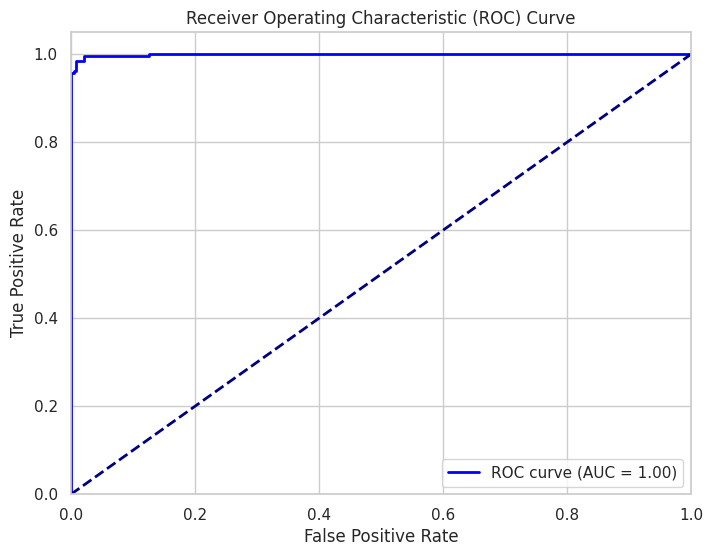

In [350]:
# Calculate the ROC curve
fprlda, tprlda, _ = roc_curve(y_test, lda_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fprlda, tprlda, color='blue', lw=2, label=f'ROC curve (AUC = {lda_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

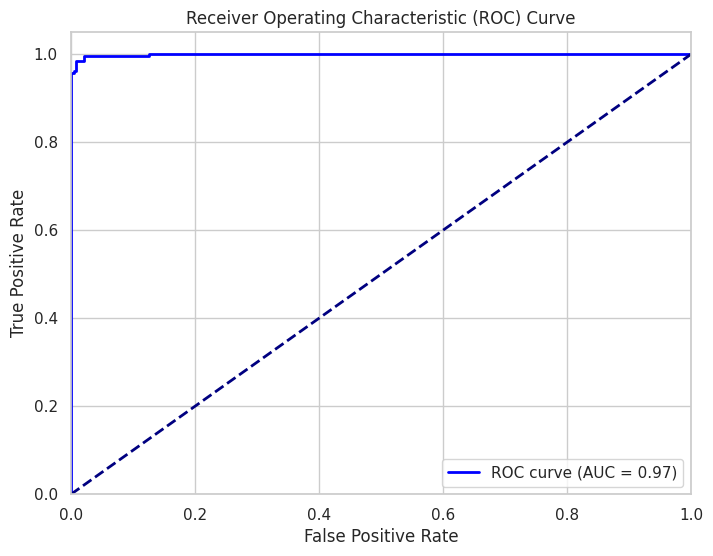

In [351]:
# Calculate the ROC curve
fprqda, tprqda, _ = roc_curve(y_test, lda_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fprqda, tprqda, color='blue', lw=2, label=f'ROC curve (AUC = {qda_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Now, for Linear Discriminant Analysis we are going to do the model 4 in Logistic Regression to check what are the results that we get.

# Discriminant Analysis for Model 4 in Logistic Regression

In [274]:
columns_to_include4 = ['LANGUAGE', 'AGE', 'RACE_ETHNICITY', 'QOL_Q_05','QOL_Q_07',
       'PH2_Q_02','CAT_CHRONICDISEASESCORE']

df_selected4 = data[columns_to_include4]
X = df_selected4.drop('CAT_CHRONICDISEASESCORE', axis=1)  # Features
y = df_selected4['CAT_CHRONICDISEASESCORE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [275]:
# First we will normalize our Training set
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [276]:
lda4 = LinearDiscriminantAnalysis()
resultslda4=lda4.fit(X_train_normalized, y_train)
qda4 = QuadraticDiscriminantAnalysis()
resultsqda4=qda4.fit(X_train_normalized, y_train)

In [277]:
lda4_pred = resultslda4.predict(X_test_normalized)
qda4_pred = resultsqda4.predict(X_test_normalized)

In [278]:
# Calculate sensitivity, specificity, and accuracy
tnlda4, fplda4, fnlda4, tplda4 = confusion_matrix(y_test, lda4_pred).ravel()
# Calculate sensitivity, specificity, and accuracy
tnqda4, fpqda4, fnqda4, tpqda4 = confusion_matrix(y_test, qda4_pred).ravel()
(tnlda4, fplda4, fnlda4, tplda4), (tnqda4, fpqda4, fnqda4, tpqda4)

((153, 69, 102, 119), (142, 80, 108, 113))

In [279]:
## Here we are going to calculate sensitivity, specificity, and accuracy
sensitivity = tplda4 / (tplda4 + fnlda4)
specificity = tnlda4 / (tnlda4 + fplda4)
accuracy = (tplda4 + tnlda4) / (tplda4 + tnlda4 + fplda4 + fnlda4)

# Print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)

Sensitivity: 0.5384615384615384
Specificity: 0.6891891891891891
Accuracy: 0.6139954853273137


In [280]:
## Here we are going to calculate sensitivity, specificity, and accuracy
sensitivity = tpqda4 / (tpqda4 + fnqda4)
specificity = tnqda4 / (tnqda4 + fpqda4)
accuracy = (tpqda4 + tnqda4) / (tpqda4 + tnqda4 + fpqda4 + fnqda4)

# Print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)

Sensitivity: 0.5113122171945701
Specificity: 0.6396396396396397
Accuracy: 0.5756207674943566
